In [1]:
%load_ext autoreload
%autoreload 2

from my_ml_crypto_trading.data_processing.data_loader import *
from my_ml_crypto_trading.data_processing.trade_features import *
from my_ml_crypto_trading.data_processing.ob_features import *
from my_ml_crypto_trading.machine_learning.machine_learning.wrapper import *
from my_ml_crypto_trading.machine_learning.machine_learning.transformer_model import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
model = PyTorchWrapper("ml_models", 20)

In [112]:
model.feed_snapshot({
    "bids": {i*0.01 : 200 for i in range(12)}, 
    "asks": {2+i*0.01 : 200 for i in range(12)}, 
    "trades":[]})

KeyError: 'mid_price'

In [100]:
model.predict({
    "bids": {i*0.01 : 200 for i in range(12)}, 
    "asks": {2+i*0.01 : 200 for i in range(12)}, 
    "trades":[]})

-0.19714775681495667

In [10]:
from datetime import datetime, timedelta
folder = "data"
contract = "CAKEUSDT"
start_date = datetime(2025, 4, 2)
end_date = datetime(2025, 4, 2)


trades_feature = TradeFeature(1, inc_vwap=True, inc_vwap_change=True, inc_vol=True, inc_vol_change=True, inc_taker_vol=True, inc_taker_vol_change=True)
volatility_feature = VolatilityFeature(10)
ob_feature = LevelOBFeature(num_levels=10, change=False, include_prices=True)
trend_feature = TrendFeature(1)

input_feature_creator = FeatureCreator([
    trades_feature, 
    volatility_feature,
    ob_feature,
    trend_feature
    ])
output_feature_creator = FeatureCreator([])

dl = DataLoader()

a, b = dl.load_features_from_data(folder, contract, start_date, end_date, timedelta(seconds=60), input_feature_creator, output_feature_creator)

2025-04-02


0 - 8


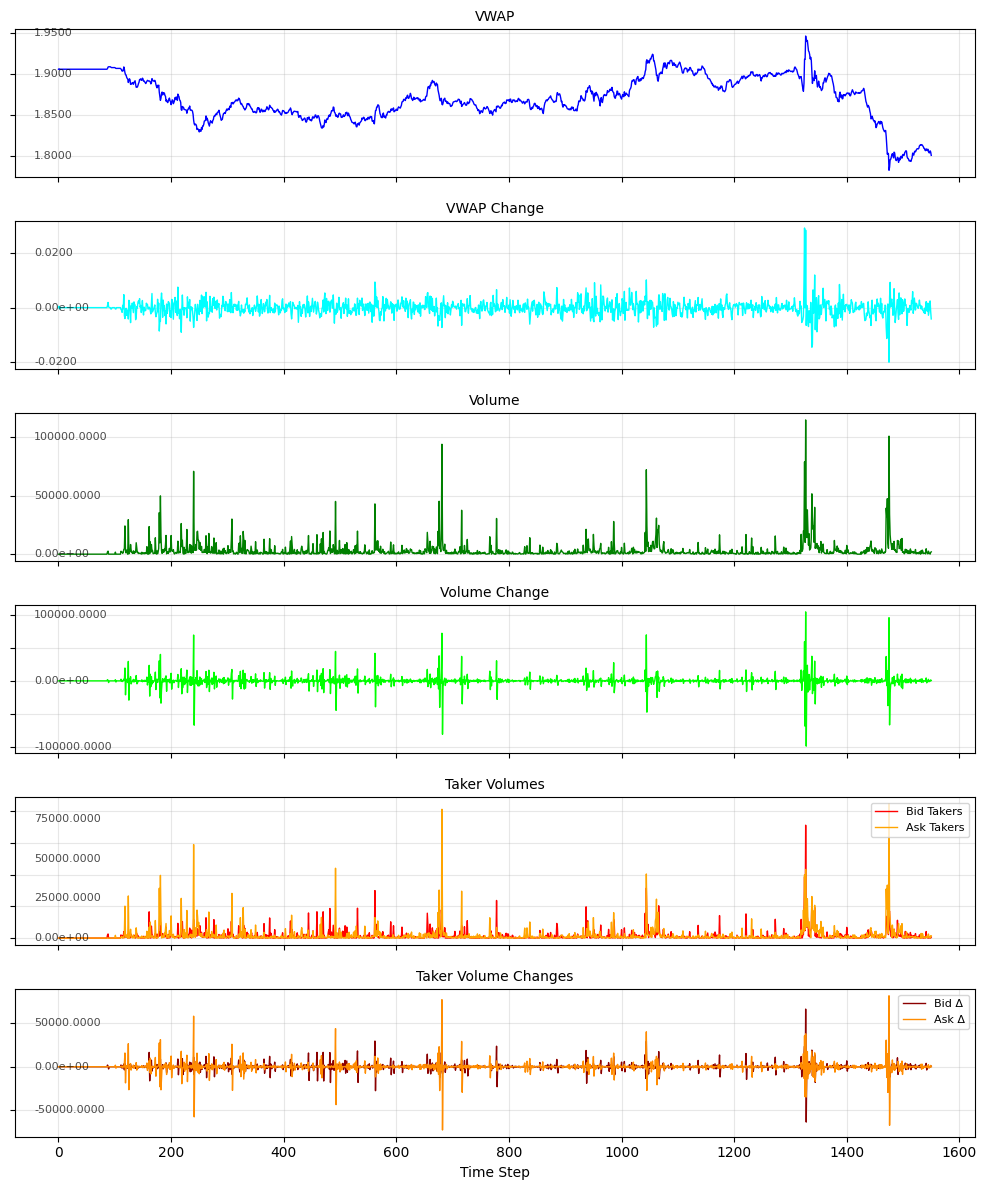

8 - 9


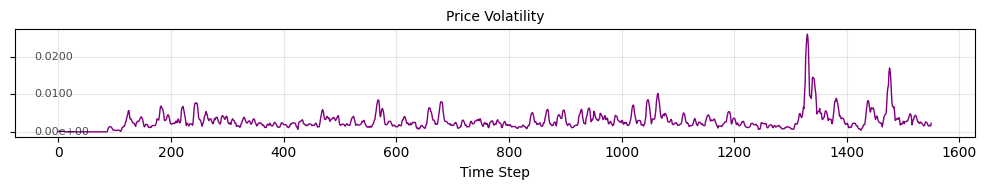

9 - 49


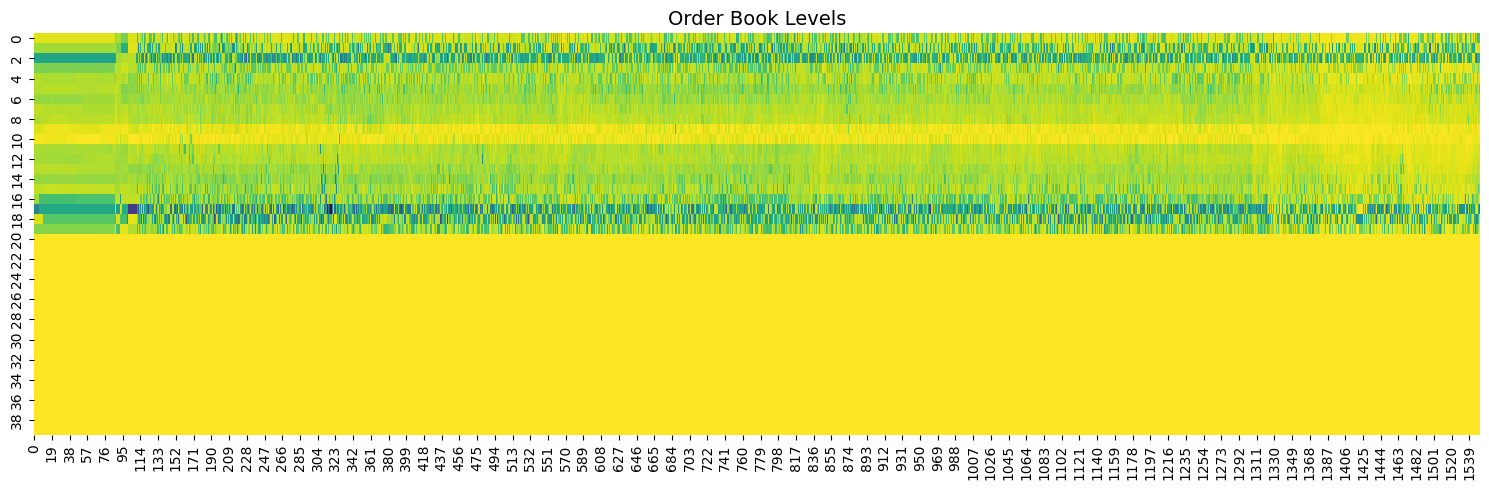

49 - 52


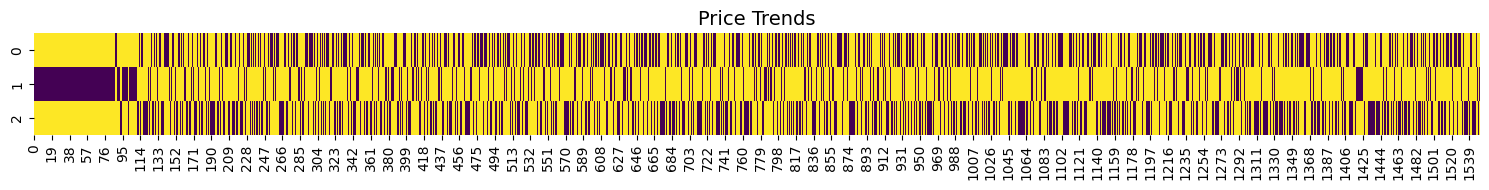

In [6]:
input_feature_creator.visualize(a, 0)
input_feature_creator.visualize(a, 1)
input_feature_creator.visualize(a, 2)
input_feature_creator.visualize(a, 3)